<a href="https://colab.research.google.com/github/KshitijShinde/Data-Science-Using-Python/blob/main/all_category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


======== Processing Target: ATTACK ========


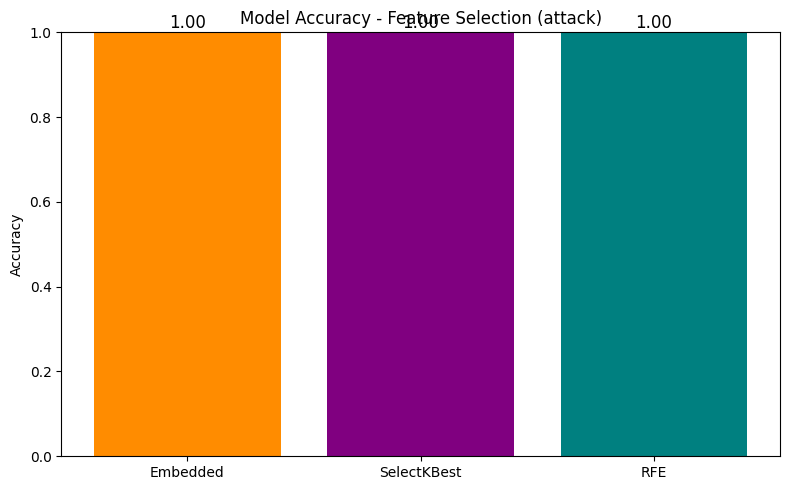


Bagging Model Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       100

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191



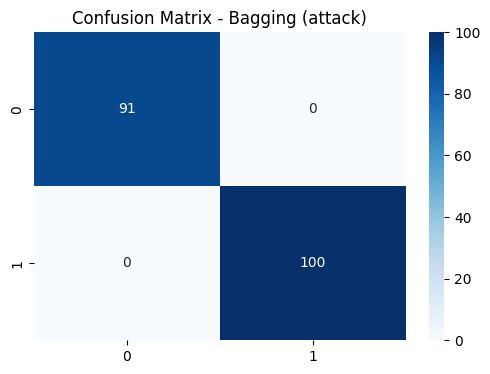


Boosting Model Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       100

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191



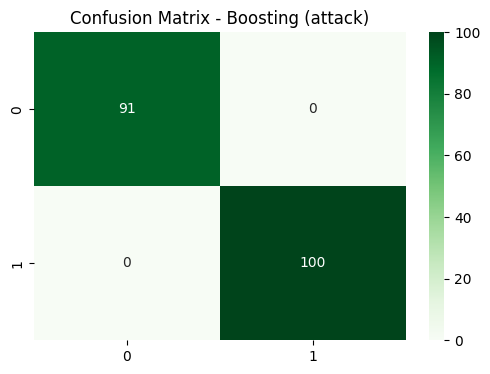


======== Processing Target: CATEGORY ========


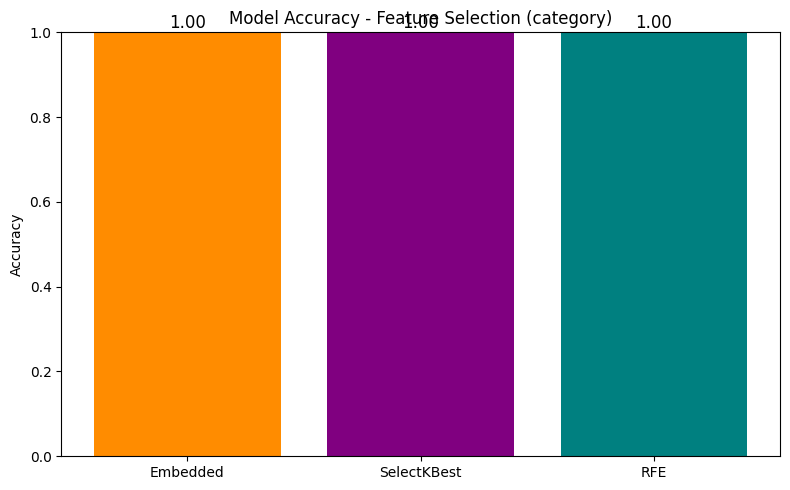


Bagging Model Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        18

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79



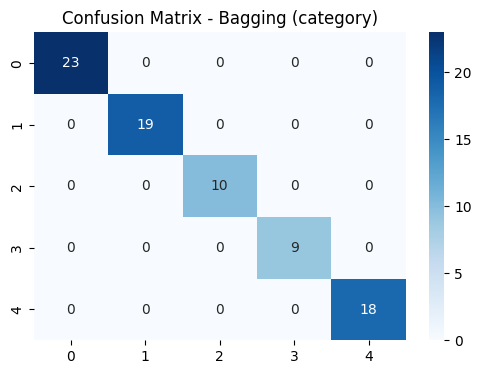


Boosting Model Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        18

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79



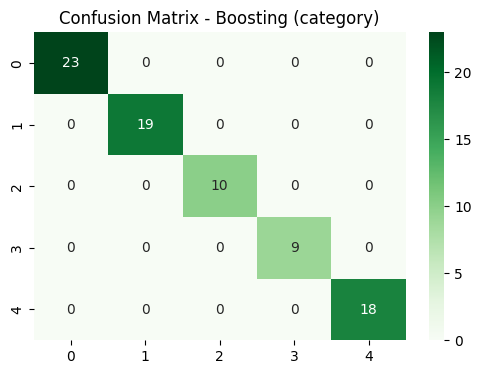


======== Processing Target: SUBCATEGORY ========


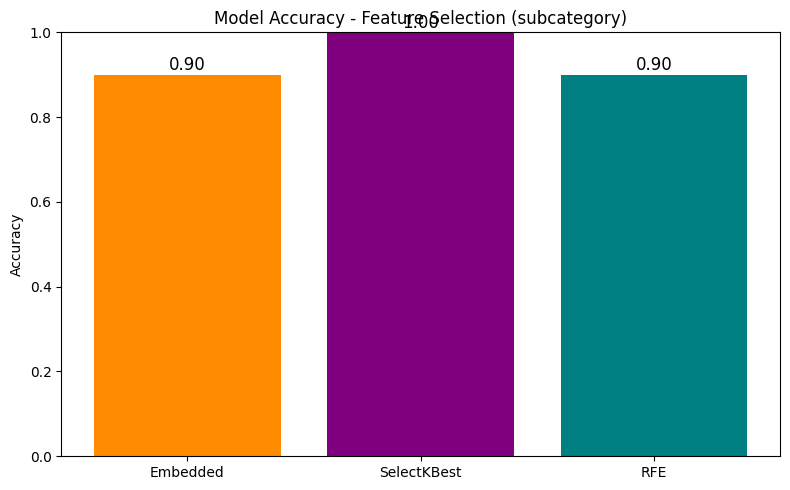


Bagging Model Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



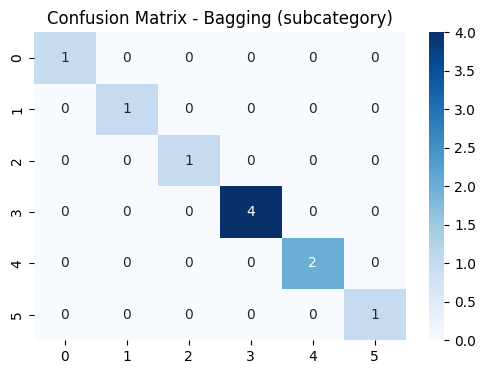


Boosting Model Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         0
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         1

    accuracy                           0.50        10
   macro avg       0.71      0.64      0.67        10
weighted avg       0.60      0.50      0.53        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

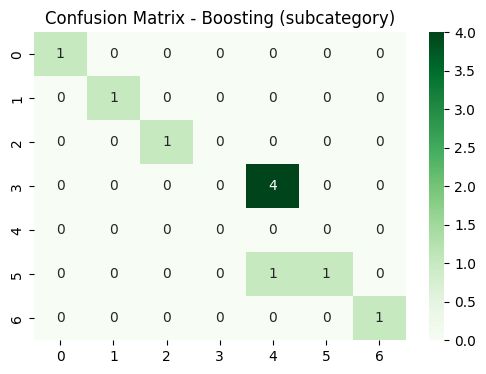

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler

# === Load and Merge CSVs ===
df1 = pd.read_csv("/content/drive/MyDrive/bot iot/UNSW_2018_IoT_Botnet_Full5pc_1.csv", low_memory=False)
df2 = pd.read_csv("/content/drive/MyDrive/bot iot/UNSW_2018_IoT_Botnet_Full5pc_2.csv", low_memory=False)
df3 = pd.read_csv("/content/drive/MyDrive/bot iot/UNSW_2018_IoT_Botnet_Full5pc_3.csv", low_memory=False)
df4 = pd.read_csv("/content/drive/MyDrive/bot iot/UNSW_2018_IoT_Botnet_Full5pc_4.csv", low_memory=False)
df = pd.concat([df1, df2, df3, df4], ignore_index=True).drop_duplicates()

# === Target Columns ===
target_columns = ['attack', 'category', 'subcategory']

for target_column in target_columns:
    print(f"\n======== Processing Target: {target_column.upper()} ========")

    # === Drop NA, Keep Numerical + Target ===
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    df_numeric = df.select_dtypes(include=[np.number])
    if target_column not in df_numeric.columns:
        df_numeric[target_column] = df[target_column]

    X = df_numeric.drop(columns=[target_column])
    y = df[target_column]

    # Encode target if needed
    if y.dtype == 'object':
        le = LabelEncoder()
        y = le.fit_transform(y)

    # === Scaling ===
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # === Balance Data ===
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X_scaled, y)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # === Feature Selection: Embedded (Random Forest) ===
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    feat_importance = rf_model.feature_importances_
    top_n = 10
    top_indices = np.argsort(feat_importance)[-top_n:]

    # === Feature Selection: SelectKBest ===
    selector = SelectKBest(score_func=f_classif, k=10)
    X_kbest = selector.fit_transform(X_train, y_train)

    # === Feature Selection: RFE ===
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
    X_rfe = rfe.fit_transform(X_train, y_train)

    # === Accuracy Comparison for Feature Selection Methods ===
    models = {
        "Embedded": X_train[:, top_indices],
        "SelectKBest": X_kbest,
        "RFE": X_rfe
    }

    accuracies = {}
    for name, X_fs in models.items():
        clf = GradientBoostingClassifier(random_state=42)
        clf.fit(X_fs, y_train)
        if name == "Embedded":
            X_fs_test = X_test[:, top_indices]
        elif name == "SelectKBest":
            X_fs_test = selector.transform(X_test)
        elif name == "RFE":
            X_fs_test = rfe.transform(X_test)

        y_pred = clf.predict(X_fs_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies[name] = acc

    plt.figure(figsize=(8, 5))
    plt.bar(accuracies.keys(), accuracies.values(), color=['darkorange', 'purple', 'teal'])
    plt.title(f"Model Accuracy - Feature Selection ({target_column})")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    for i, v in enumerate(accuracies.values()):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12)
    plt.tight_layout()
    plt.show()

    # === Bagging Classifier ===
    bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
    bagging_model.fit(X_train, y_train)
    y_pred_bagging = bagging_model.predict(X_test)
    print("\nBagging Model Report:")
    print(classification_report(y_test, y_pred_bagging))
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred_bagging), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - Bagging ({target_column})")
    plt.show()

    # === Boosting Classifier ===
    boosting_model = GradientBoostingClassifier(random_state=42)
    boosting_model.fit(X_train, y_train)
    y_pred_boosting = boosting_model.predict(X_test)
    print("\nBoosting Model Report:")
    print(classification_report(y_test, y_pred_boosting))
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred_boosting), annot=True, fmt='d', cmap='Greens')
    plt.title(f"Confusion Matrix - Boosting ({target_column})")
    plt.show()
